## For DAT410- AI System Design - Assignment 4 - Diagnostic System

In [32]:
import pandas as pd

# suffixes 0 1 2 represent the mean, standard error and worst value over a set of samples
data_file = './wdbc.pkl'
df = pd.read_pickle(data_file)
print(df.head(5))
print(df.T[0])

         id  malignant  radius_0  texture_0  perimeter_0  area_0  \
0    842302          1     17.99      10.38       122.80  1001.0   
1    842517          1     20.57      17.77       132.90  1326.0   
2  84300903          1     19.69      21.25       130.00  1203.0   
3  84348301          1     11.42      20.38        77.58   386.1   
4  84358402          1     20.29      14.34       135.10  1297.0   

   smoothness_0  compactness_0  concavity_0  concave points_0  ...  radius_2  \
0       0.11840        0.27760       0.3001           0.14710  ...     25.38   
1       0.08474        0.07864       0.0869           0.07017  ...     24.99   
2       0.10960        0.15990       0.1974           0.12790  ...     23.57   
3       0.14250        0.28390       0.2414           0.10520  ...     14.91   
4       0.10030        0.13280       0.1980           0.10430  ...     22.54   

   texture_2  perimeter_2  area_2  smoothness_2  compactness_2  concavity_2  \
0      17.33       184.60  2019

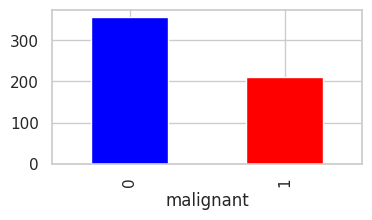

In [57]:
# plot the distribution of the malignant and benign samples, using plot only
import matplotlib.pyplot as plt
df['malignant'].value_counts().plot(kind='bar', color=['blue', 'red'], figsize=(4, 2))
plt.show()


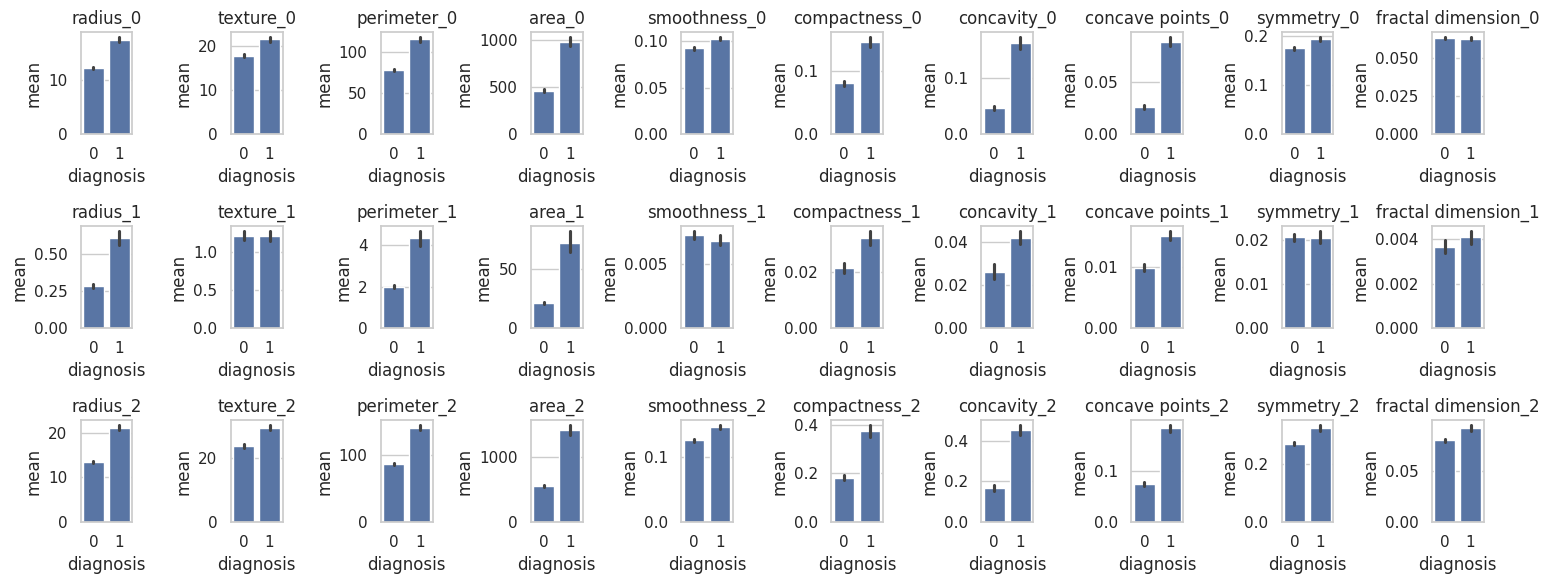

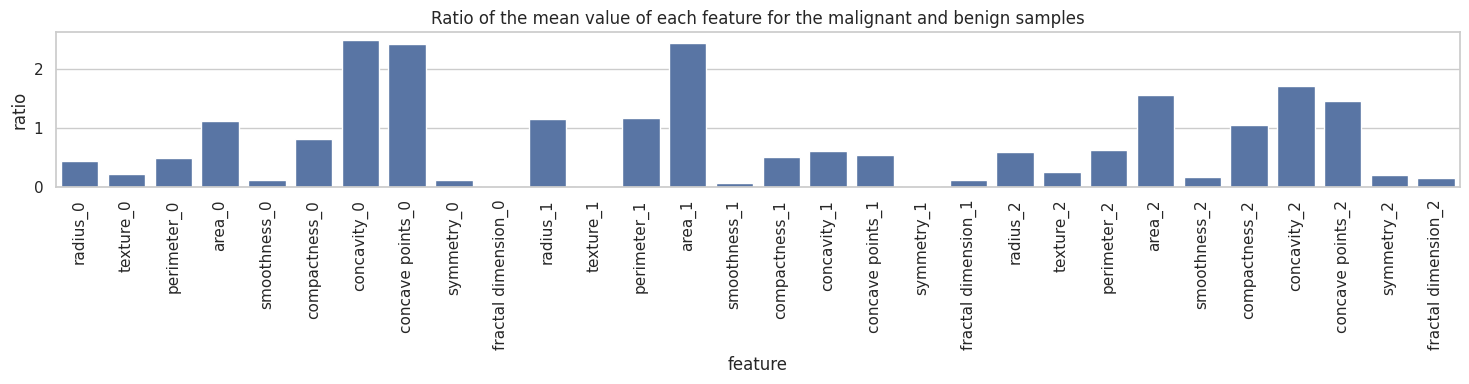

In [58]:

# calculate the mean value of each feature for the malignant and benign samples
malignant_mean = df[df['malignant'] == 1][features].mean()
benign_mean = df[df['malignant'] == 0][features].mean()

# plot the mean with bar chart, one subplot for one feature
import seaborn as sns
fig, axes = plt.subplots(3, 10, figsize=(15, 6))
for i, feature in enumerate(features):
    ax = axes[int(i / 10), i % 10]
    sns.barplot(x='malignant', y=feature, data=df, ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('mean')
    ax.set_xlabel('diagnosis')
plt.tight_layout()
plt.show()

ratio = abs(malignant_mean - benign_mean) / benign_mean
# plot the ratio of the mean value of each feature for the malignant and benign samples
fig, ax = plt.subplots(figsize=(15, 4))
sns.barplot(x=ratio.index, y=ratio.values, ax=ax)
ax.set_title('Ratio of the mean value of each feature for the malignant and benign samples')
ax.set_ylabel('ratio')
ax.set_xlabel('feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# cell size -> area_mean, area_se, area_worst
# cell shape -> concavity_mean, concavity_se, concavity_worst
# cell texture ->  texture_mean, texture_se, texture_worst
# cell homogeneity -> smoothness_mean, smoothness_se, smoothness_worst
